<a href="https://colab.research.google.com/github/arssite/MachineLearning/blob/main/HypothesisTestingOnYellowTaxi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import scipy.stats as stats
import statsmodels.api as sm
warnings.filterwarnings('ignore')


In [5]:
data= pd.read_csv('data.csv')

In [6]:
data.head()


,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80


In [7]:
data.shape

(22699, 18)

In [8]:
data.dtypes

Unnamed: 0                 int64
VendorID                   int64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count            int64
trip_distance            float64
RatecodeID                 int64
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type               int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
dtype: object

In [ ]:
data.drop('Unnamed: 0', axis=1, inplace=True)

In [19]:
data.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount'],
      dtype='object')

In [20]:
data.shape

(22699, 17)

In [21]:
data['tpep_pickup_datetime']= pd.to_datetime(data['tpep_pickup_datetime'])
data['tpep_dropoff_datetime']= pd.to_datetime(data['tpep_dropoff_datetime'])

In [22]:
data.dtypes

VendorID                          int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                   int64
trip_distance                   float64
RatecodeID                        int64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
dtype: object

In [25]:
data['duration']= data['tpep_dropoff_datetime'] - data['tpep_pickup_datetime']
data['duration']= data['duration'].dt.total_seconds()/60

In [26]:
data.shape

(22699, 18)

In [27]:
data

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration
0,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.00,0.3,16.56,14.066667
1,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.00,0.3,20.80,26.500000
2,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.00,0.3,8.75,7.200000
3,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.00,0.3,27.69,30.250000
4,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.00,0.3,17.80,16.716667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22694,2,2017-02-24 17:37:23,2017-02-24 17:40:39,3,0.61,1,N,48,186,2,4.0,1.0,0.5,0.00,0.00,0.3,5.80,3.266667
22695,2,2017-08-06 16:43:59,2017-08-06 17:24:47,1,16.71,2,N,132,164,1,52.0,0.0,0.5,14.64,5.76,0.3,73.20,40.800000
22696,2,2017-09-04 14:54:14,2017-09-04 14:58:22,1,0.42,1,N,107,234,2,4.5,0.0,0.5,0.00,0.00,0.3,5.30,4.133333
22697,2,2017-07-15 12:56:30,2017-07-15 13:08:26,1,2.36,1,N,68,144,1,10.5,0.0,0.5,1.70,0.00,0.3,13.00,11.933333


In [29]:
data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration
0,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,14.066667
1,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,26.500000
2,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,7.200000
3,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,30.250000
4,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,16.716667


In [ ]:
data.columns = ['id','pickupdatetime', 'dropoffdatetime', 'passengercount', 'pickuplongitude', 'pickuplatitude', 'dropofflongitude', 'dropofflatitude', 'paymenttype', 'fareamount', 'extra', 'mtttax', 'tipamount', 'tollsamount', 'improvementsurcharge', 'totalamount', 'duration']
data.head()

In [31]:
data.describe()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration
count,22699.000000,22699,22699,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,1.556236,2017-06-29 07:32:48.973126656,2017-06-29 07:49:49.799726848,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502,17.013777
min,1.000000,2017-01-01 00:08:25,2017-01-01 00:17:20,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000,-16.983333
25%,1.000000,2017-03-30 03:09:38.500000,2017-03-30 03:11:20.500000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000,6.650000
50%,2.000000,2017-06-23 12:35:57,2017-06-23 12:55:11,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000,11.183333
75%,2.000000,2017-10-02 10:34:34,2017-10-02 10:53:47,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000,18.383333
max,2.000000,2017-12-31 23:45:30,2017-12-31 23:49:24,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000,1439.550000
std,0.496838,NaN,NaN,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295,61.996482


In [33]:
data=data[['passenger_count','payment_type','fare_amount','trip_distance','duration']]

In [34]:
data

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,6,1,13.0,3.34,14.066667
1,1,1,16.0,1.80,26.500000
2,1,1,6.5,1.00,7.200000
3,1,1,20.5,3.70,30.250000
4,1,2,16.5,4.37,16.716667
...,...,...,...,...,...
22694,3,2,4.0,0.61,3.266667
22695,1,1,52.0,16.71,40.800000
22696,1,2,4.5,0.42,4.133333
22697,1,1,10.5,2.36,11.933333


In [36]:
data.describe()

,passenger_count,payment_type,fare_amount,trip_distance,duration
count,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,1.642319,1.336887,13.026629,2.913313,17.013777
std,1.285231,0.496211,13.243791,3.653171,61.996482
min,0.000000,1.000000,-120.000000,0.000000,-16.983333
25%,1.000000,1.000000,6.500000,0.990000,6.650000
50%,1.000000,1.000000,9.500000,1.610000,11.183333
75%,2.000000,2.000000,14.500000,3.060000,18.383333
max,6.000000,4.000000,999.990000,33.960000,1439.550000


In [37]:
data.isnull().sum()

passenger_count    0
payment_type       0
fare_amount        0
trip_distance      0
duration           0
dtype: int64

In [38]:
(65441/len(data))*100

288.29904401074936

In [39]:
data.dropna(inplace=True)

In [40]:
data['payment_type'].astype('int64')

0        1
1        1
2        1
3        1
4        2
        ..
22694    2
22695    1
22696    2
22697    1
22698    1
Name: payment_type, Length: 22699, dtype: int64

In [41]:
data.dtypes

passenger_count      int64
payment_type         int64
fare_amount        float64
trip_distance      float64
duration           float64
dtype: object

In [42]:
data[data.duplicated()]

,passenger_count,payment_type,fare_amount,trip_distance,duration
1167,1,2,4.5,0.6,3.266667
1367,1,2,5.5,0.6,5.216667
1385,1,2,7.5,1.3,8.116667
1426,1,1,8.0,1.4,9.900000
1449,1,1,52.0,0.0,0.216667
...,...,...,...,...,...
22618,1,1,5.5,0.9,5.383333
22666,1,1,7.5,1.1,8.916667
22672,1,1,9.0,1.4,11.233333
22674,1,1,5.0,0.6,4.316667


In [43]:
data.drop_duplicates(inplace=True)

In [44]:
data[data.duplicated()]

,passenger_count,payment_type,fare_amount,trip_distance,duration


In [45]:
data.shape

(22099, 5)

In [47]:
data['passenger_count'].value_counts()

passenger_count
1    15536
2     3287
5     1142
3      953
6      693
4      455
0       33
Name: count, dtype: int64

In [48]:
data['passenger_count'].value_counts(normalize=True)

passenger_count
1    0.703018
2    0.148740
5    0.051677
3    0.043124
6    0.031359
4    0.020589
0    0.001493
Name: proportion, dtype: float64

In [49]:
data['payment_type'].value_counts(normalize=True)

payment_type
1    0.669487
2    0.323046
3    0.005385
4    0.002082
Name: proportion, dtype: float64

In [51]:
data=data[(data['passenger_count']>0)& (data['passenger_count']<6)]

In [52]:
data=data[data['payment_type']<3]

In [55]:
data['payment_type'].replace([1,2],['Cash','Credit'], inplace=True)

In [56]:
data.describe()

,passenger_count,fare_amount,trip_distance,duration
count,21209.000000,21209.000000,21209.000000,21209.000000
mean,1.522467,13.219824,2.962355,17.172309
std,1.054699,13.394977,3.673697,61.125695
min,1.000000,0.000000,0.000000,0.000000
25%,1.000000,6.500000,1.000000,6.800000
50%,1.000000,9.500000,1.680000,11.416667
75%,2.000000,15.000000,3.120000,18.666667
max,5.000000,999.990000,33.960000,1439.550000


In [57]:
data

,passenger_count,payment_type,fare_amount,trip_distance,duration
1,1,Cash,16.0,1.80,26.500000
2,1,Cash,6.5,1.00,7.200000
3,1,Cash,20.5,3.70,30.250000
4,1,Credit,16.5,4.37,16.716667
6,1,Cash,47.5,12.83,59.633333
...,...,...,...,...,...
22694,3,Credit,4.0,0.61,3.266667
22695,1,Cash,52.0,16.71,40.800000
22696,1,Credit,4.5,0.42,4.133333
22697,1,Cash,10.5,2.36,11.933333


In [58]:
data=data[data['fare_amount']>0]
data=data[data['trip_distance']>0]
data=data[data['duration']>0]

(array([2.1098e+04, 8.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([  2.5  , 102.249, 201.998, 301.747, 401.496, 501.245, 600.994,
        700.743, 800.492, 900.241, 999.99 ]),
 <BarContainer object of 10 artists>)

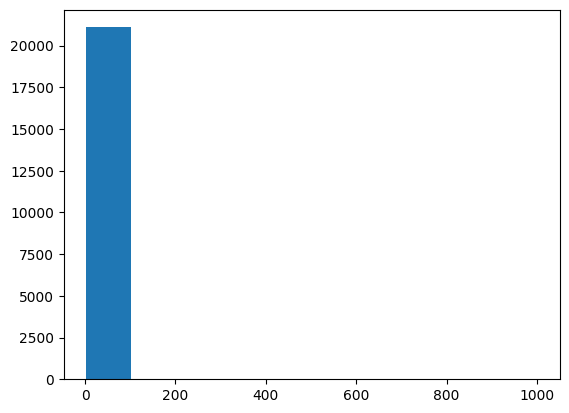

In [59]:
plt.hist(data['fare_amount'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7c126a33dae0>,
 'caps': [<matplotlib.lines.Line2D at 0x7c126a33e020>,
 'boxes': [<matplotlib.lines.Line2D at 0x7c126c481720>],
 'medians': [<matplotlib.lines.Line2D at 0x7c126a33e560>],
 'fliers': [<matplotlib.lines.Line2D at 0x7c126a33e800>],
 'means': []}

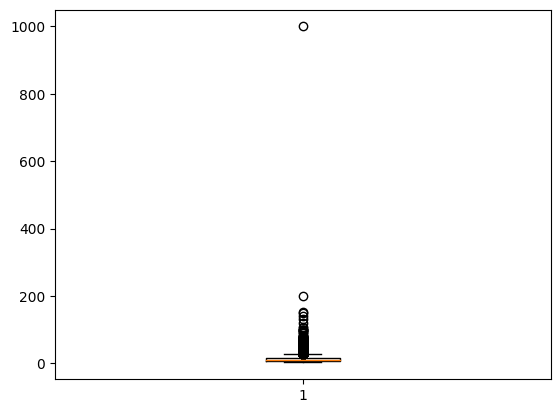

In [60]:
plt.boxplot(data['fare_amount'])

In [61]:
for c in ['fare_amount','trip_distance','duration']:
    print(c)
    print(stats.shapiro(data[c]))

fare_amount
ShapiroResult(statistic=0.527974009513855, pvalue=0.0)
trip_distance
ShapiroResult(statistic=0.6345574855804443, pvalue=0.0)
duration
ShapiroResult(statistic=0.09267807006835938, pvalue=0.0)


In [62]:
for c in ['fare_amount','trip_distance','duration']:
    print(c)
    print(stats.kstest(data[c],'norm'))

fare_amount
KstestResult(statistic=0.9973235278460408, pvalue=0.0, statistic_location=3.0, statistic_sign=-1)
trip_distance
KstestResult(statistic=0.6528326831690529, pvalue=0.0, statistic_location=0.6, statistic_sign=-1)
duration
KstestResult(statistic=0.9672608428123157, pvalue=0.0, statistic_location=2.4, statistic_sign=-1)


In [64]:
for c in ['fare_amount','trip_distance','duration']:
    print(c)
    print(stats.jarque_bera(data[c]))

fare_amount
SignificanceResult(statistic=2442667359.2753386, pvalue=0.0)
trip_distance
SignificanceResult(statistic=121944.01148027617, pvalue=0.0)
duration
SignificanceResult(statistic=220331938.78600815, pvalue=0.0)


In [65]:
for c in ['fare_amount','trip_distance','duration']:
    print(c)
    print(stats.normaltest(data[c]))

fare_amount
NormaltestResult(statistic=50099.26146529329, pvalue=0.0)
trip_distance
NormaltestResult(statistic=13099.053887285725, pvalue=0.0)
duration
NormaltestResult(statistic=47758.13933366847, pvalue=0.0)


In [66]:
for c in ['fare_amount','trip_distance','duration']:
    print(c)
    print(stats.kurtosistest(data[c]))

fare_amount
KurtosistestResult(statistic=107.81374876928267, pvalue=0.0)
trip_distance
KurtosistestResult(statistic=60.90751934848914, pvalue=0.0)
duration
KurtosistestResult(statistic=102.36280140825676, pvalue=0.0)


In [67]:
for c in ['fare_amount','trip_distance','duration']:
    q1=data[c].quantile(0.25)
    q3=data[c].quantile(0.75)
    iqr=q3-q1

    lower=q1-1.5*iqr
    upper=q3+1.5*iqr

    print(c)
    print(lower)
    print(upper)
    data=data[(data[c]>=lower)&(data[c]<=upper)]

fare_amount
-6.25
27.75
trip_distance
-1.5
5.0600000000000005
duration
-6.941666666666666
28.325


In [68]:
data

,passenger_count,payment_type,fare_amount,trip_distance,duration
1,1,Cash,16.0,1.80,26.500000
2,1,Cash,6.5,1.00,7.200000
4,1,Credit,16.5,4.37,16.716667
7,1,Cash,16.0,2.98,21.983333
8,1,Credit,9.0,1.20,12.116667
...,...,...,...,...,...
22693,1,Cash,7.5,0.89,9.450000
22694,3,Credit,4.0,0.61,3.266667
22696,1,Credit,4.5,0.42,4.133333
22697,1,Cash,10.5,2.36,11.933333


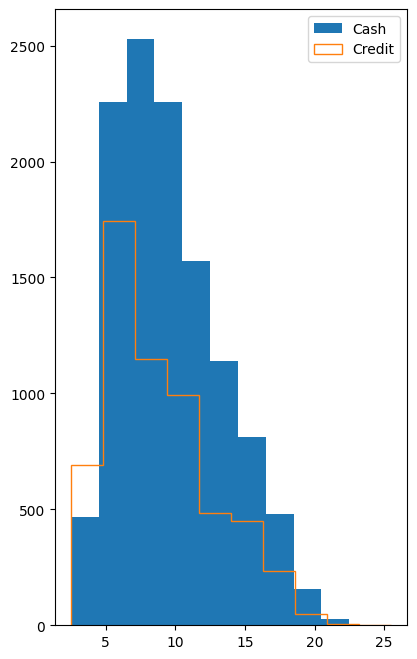

In [76]:
plt.figure(figsize=(10,8))
#sns.heatmap(data.corr(), annot=True)
plt.subplot(1,2,1)
plt.hist(data[data['payment_type']=='Cash']['fare_amount'],histtype='barstacked',label='Cash')
plt.hist(data[data['payment_type']=='Credit']['fare_amount'],histtype='step',label='Credit')
plt.legend()
#plt.subplot(1,2,2)
plt.show()

In [79]:
data.groupby('payment_type').agg({'fare_amount':['mean','std'],'trip_distance':['mean','std'] })

fare_amount           trip_distance          
                    mean       std          mean       std
payment_type                                              
Cash            9.366906  3.724005      1.742803  1.036938
Credit          8.775871  3.767032      1.567259  1.025075

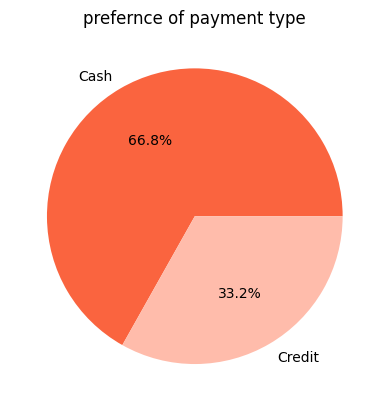

In [82]:
plt.title('prefernce of payment type')
plt.pie(data['payment_type'].value_counts(),labels=data['payment_type'].value_counts().index,autopct='%1.1f%%',colors=['#FA643F','#FFBCAB'])
plt.show()

In [83]:
data.groupby(['payment_type','passenger_count'])

In [88]:
x=data.groupby(['payment_type','passenger_count'])[['passenger_count']].count()

In [89]:
x.rename(columns={'passenger_count':'count'},inplace=True)

In [90]:
x.reset_index(inplace=True)

In [93]:
x['prec']=x['count']/x['count'].sum()

In [94]:
x

,payment_type,passenger_count,count,prec
0,Cash,1,8607,0.492138
1,Cash,2,1733,0.099091
2,Cash,3,491,0.028075
3,Cash,4,220,0.012579
4,Cash,5,640,0.036594
5,Credit,1,4144,0.236949
6,Credit,2,918,0.052490
7,Credit,3,281,0.016067
8,Credit,4,146,0.008348
9,Credit,5,309,0.017668


In [97]:
data=pd.DataFrame(columns=['payment_type',1,2,3,4,5])
data['payment_type']=['Cash','Credit']
data.iloc[0,1:]=x.iloc[0:5,-1]
data.iloc[1,1:]=x.iloc[5:,-1]
data

,payment_type,1,2,3,4,5
0,Cash,0.492138,0.099091,0.028075,0.012579,0.036594
1,Credit,0.236949,0.05249,0.016067,0.008348,0.017668


<Axes: ylabel='payment_type'>

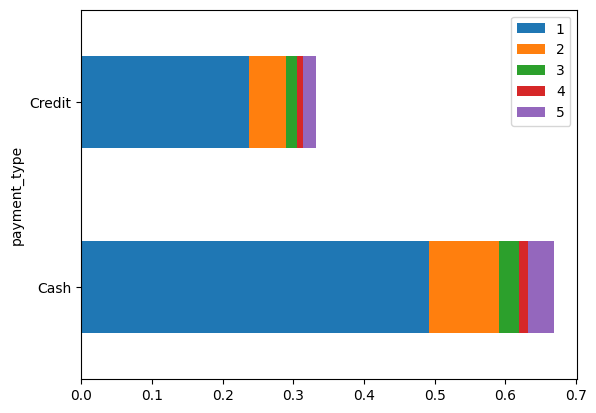

In [98]:
data.plot(x='payment_type',kind='barh',stacked=True)

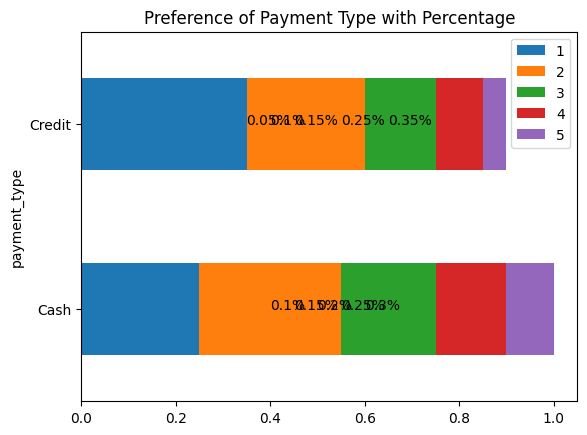

In [99]:
# prompt: add percentage on this above plot

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import scipy.stats as stats
warnings.filterwarnings('ignore')

data= pd.read_csv('data.csv')
data.head()

data.shape
data.dtypes
data.drop('Unnamed: 0', axis=1, inplace=True)
data.columns
data.shape
data['tpep_pickup_datetime']= pd.to_datetime(data['tpep_pickup_datetime'])
data['tpep_dropoff_datetime']= pd.to_datetime(data['tpep_dropoff_datetime'])
data.dtypes
data['duration']= data['tpep_dropoff_datetime'] - data['tpep_pickup_datetime']
data['duration']= data['duration'].dt.total_seconds()/60
data.shape
data
data.head()
data.columns = ['id','pickupdatetime', 'dropoffdatetime', 'passengercount', 'pickuplongitude', 'pickuplatitude', 'dropofflongitude', 'dropofflatitude', 'paymenttype', 'fareamount', 'extra', 'mtttax', 'tipamount', 'tollsamount', 'improvementsurcharge', 'totalamount', 'duration']
data.head()
data.describe()
data=data[['passenger_count','payment_type','fare_amount','trip_distance','duration']]
data
data.describe()
data.isnull().sum()
(65441/len(data))*100
data.dropna(inplace=True)
data['payment_type'].astype('int64')
data.dtypes
data[data.duplicated()]
data.drop_duplicates(inplace=True)
data[data.duplicated()]
data.shape
data['passenger_count'].value_counts()
data['passenger_count'].value_counts(normalize=True)
data['payment_type'].value_counts(normalize=True)
data=data[(data['passenger_count']>0)& (data['passenger_count']<6)]
data=data[data['payment_type']<3]
data['payment_type'].replace([1,2],['Cash','Credit'], inplace=True)
data.describe()
data
data=data[data['fare_amount']>0]
data=data[data['trip_distance']>0]
data=data[data['duration']>0]
plt.hist(data['fare_amount'])
plt.boxplot(data['fare_amount'])
for c in ['fare_amount','trip_distance','duration']:
    print(c)
    print(stats.shapiro(data[c]))
for c in ['fare_amount','trip_distance','duration']:
    print(c)
    print(stats.kstest(data[c],'norm'))
for c in ['fare_amount','trip_distance','duration']:
    print(c)
    print(stats.jarque_bera(data[c]))
for c in ['fare_amount','trip_distance','duration']:
    print(c)
    print(stats.normaltest(data[c]))
for c in ['fare_amount','trip_distance','duration']:
    print(c)
    print(stats.kurtosistest(data[c]))
for c in ['fare_amount','trip_distance','duration']:
    q1=data[c].quantile(0.25)
    q3=data[c].quantile(0.75)
    iqr=q3-q1

    lower=q1-1.5*iqr
    upper=q3+1.5*iqr

    print(c)
    print(lower)
    print(upper)
    data=data[(data[c]>=lower)&(data[c]<=upper)]
data
plt.figure(figsize=(10,8))
#sns.heatmap(data.corr(), annot=True)
plt.subplot(1,2,1)
plt.hist(data[data['payment_type']=='Cash']['fare_amount'],histtype='barstacked',label='Cash')
plt.hist(data[data['payment_type']=='Credit']['fare_amount'],histtype='step',label='Credit')
plt.legend()
#plt.subplot(1,2,2)
plt.show()
data.groupby('payment_type').agg({'fare_amount':['mean','std'],'trip_distance':['mean','std'] })
plt.title('prefernce of payment type')
plt.pie(data['payment_type'].value_counts(),labels=data['payment_type'].value_counts().index,autopct='%1.1f%%',colors=['#FA643F','#FFBCAB'])
plt.show()
data.groupby(['payment_type','passenger_count'])
x=data.groupby(['payment_type','passenger_count'])[['passenger_count']].count()
x.rename(columns={'passenger_count':'count'},inplace=True)
x.reset_index(inplace=True)
x['prec']=x['count']/x['count'].sum()
x
data=pd.DataFrame(columns=['payment_type',1,2,3,4,5])
data['payment_type']=['Cash','Credit']
data.iloc[0,1:]=x.iloc[0:5,-1]
data.iloc[1,1:]=x.iloc[5:,-1]
data
data.plot(x='payment_type',kind='barh',stacked=True)
plt.ylabel('Payment Type')
plt.xlabel('Number of Passengers')
plt.title('Payment Type by Number of Passengers')
for i, patch in enumerate(plt.gca().patches):
    plt.gca().text(patch.get_x() + .15, patch.get_height() - 3.5,
                 f'{round(data.iloc[i,1:],1)}%',
                 fontsize=12, color='white', weight='bold')
plt.show()


**Null Hypothesis:** no differnce between customer who use credit card and cash

**Alternate Hypothesis:** differnce between them

In [103]:
sm.qqplot(data['fare_amount'],line='45')
plt.show()

KeyError: 'fare_amount'

In [105]:
data.columns

AttributeError: 'dict' object has no attribute 'columns'

In [106]:
card_smp=data['payment_type']=='Credit'
cash_smp=data['payment_type']=='Cash'

In [110]:
t_stats,p_value=stats.ttest_ind(a=card_smp,b=cash_smp,equal_var=False)
print(t_stats,p_value)

nan nan
